# House Sales Analysis

**Authors:** Peris Wamoni
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

An insurance company needs to estimate the potential payout in the event of a total loss of a home. This payout is largely determined by the market value of the home. Therefore, the company needs a model that can accurately predict the market value of a home based on its features.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [ ]:
This data comes from 

In [103]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [104]:
# Loading csv file into a pandas dataframe 
df = pd.read_csv('data/kc_house_data.csv')



In [105]:
# Displaying the first few rows 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [106]:
# Checking shape
print (df.shape)

(21597, 21)


In [107]:
# Checking data types of the columns
print (df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [108]:
# Checking for missing values
print (df.isnull().sum())


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [109]:
# Getting the summary statistics
print (df.describe())

                 id         price      bedrooms     bathrooms   sqft_living   
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000  \
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated   
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000  \
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761    

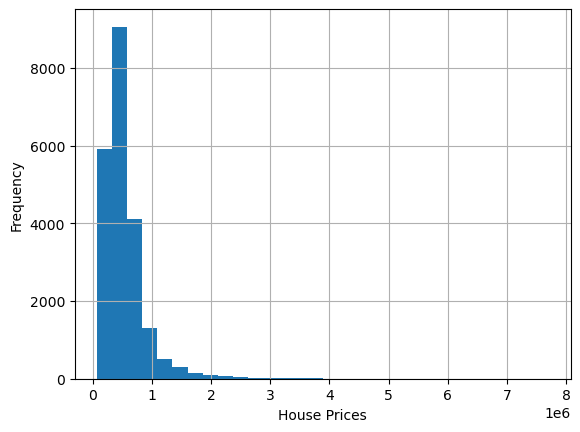

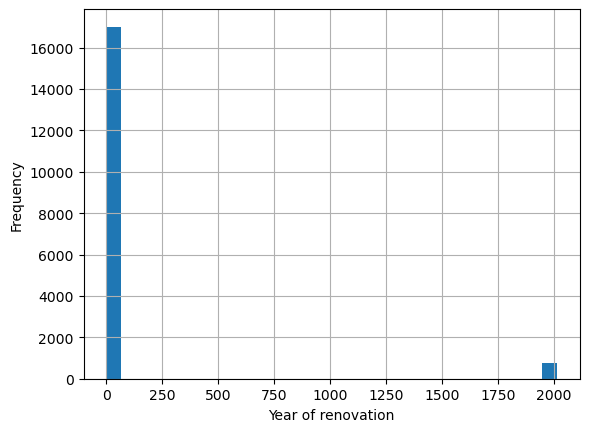

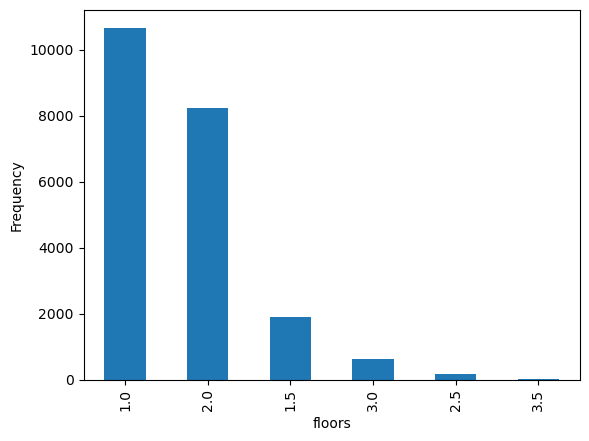

In [110]:
# Visualizing the data for better understanding 
df['price'].hist(bins=30)
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.show()

df['yr_renovated'].hist(bins=30)
plt.xlabel('Year of renovation')
plt.ylabel('Frequency')
plt.show()

df['floors'].value_counts().plot(kind='bar')
plt.xlabel('floors')
plt.ylabel('Frequency')
plt.show()

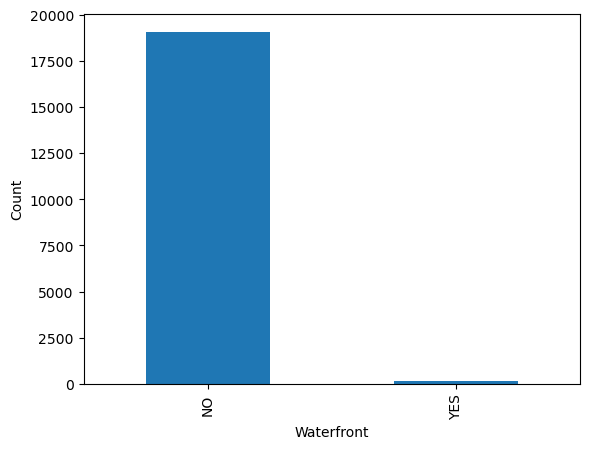

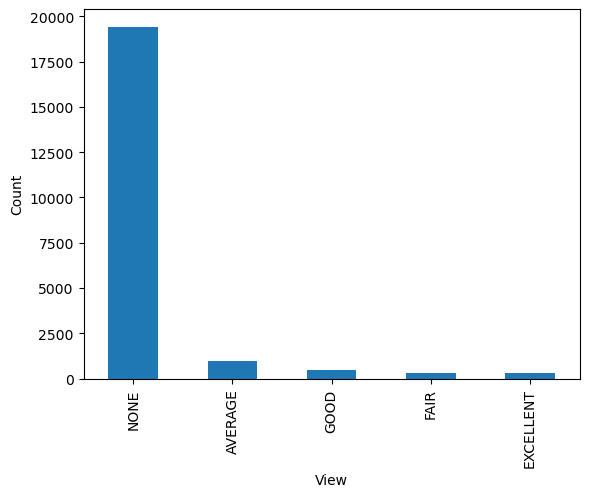

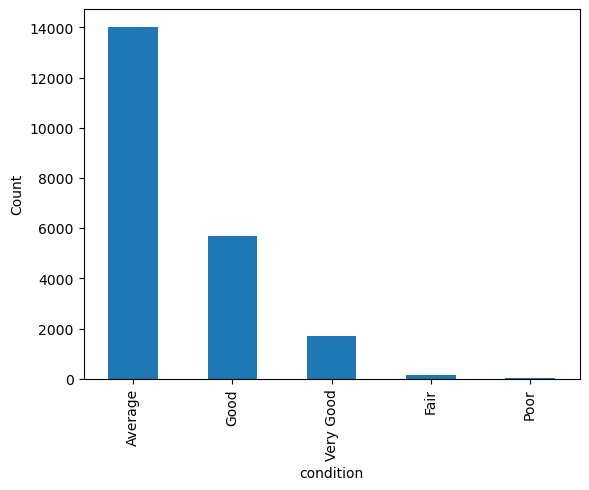

In [111]:
# For categorical variables
df['waterfront'].value_counts().plot(kind='bar')
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.show()

df['view'].value_counts().plot(kind='bar')
plt.xlabel('View')
plt.ylabel('Count')
plt.show()

df['condition'].value_counts().plot(kind='bar')
plt.xlabel('condition')
plt.ylabel('Count')
plt.show()

## Visualising the relationship of numeric variables that might have a strong relationship with price using scatterplots. 

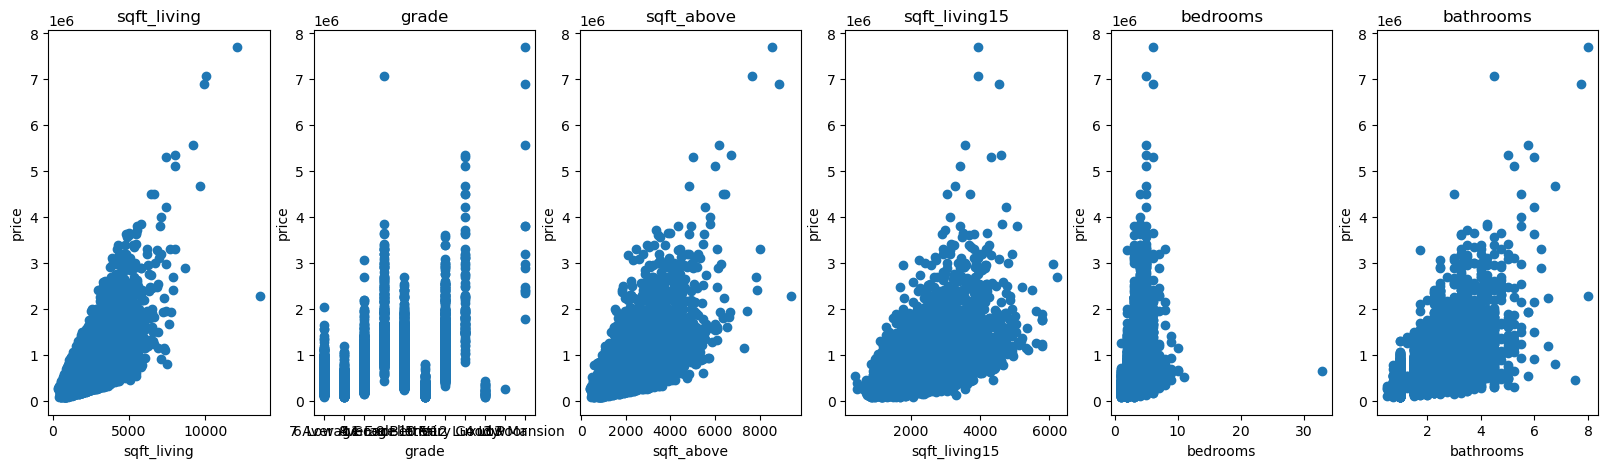

In [112]:
plt.figure(figsize=(20, 5))

features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bedrooms','bathrooms']
target = df['price']

for i, feature in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    plt.scatter(df[feature], target)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('price')


### We are interested in how variables in our dataset are correlated with price. In order to understand how the market value of houses is affected by its features, we begin by understanding the relationships between our target variable 'price' and other features in the dataset.

Let's begin by looking at a heatmap where each cell represents the correlation coefficient between two variables. Dark colors represent strong correlations(either positive or negative) while weak colors represent weak correlations. This will give us some insights into the relationships of these different variabes. 

<Axes: >

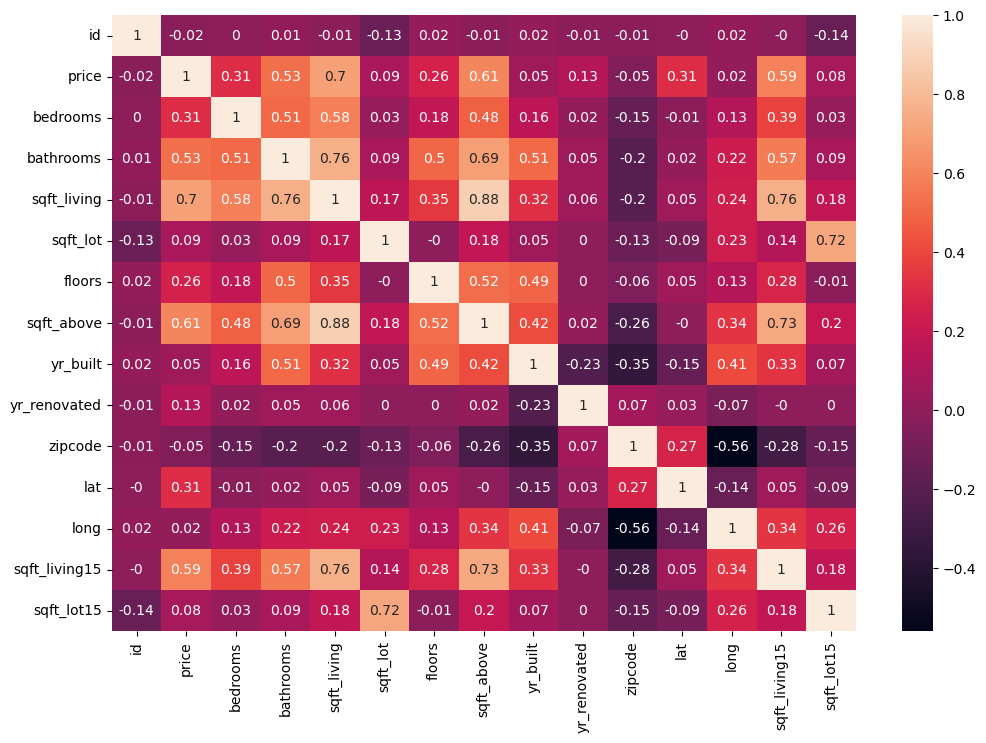

In [146]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr().round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True)


More specifically, let's look at the correlation of all numeric columns with the price column and sort them in descending order.

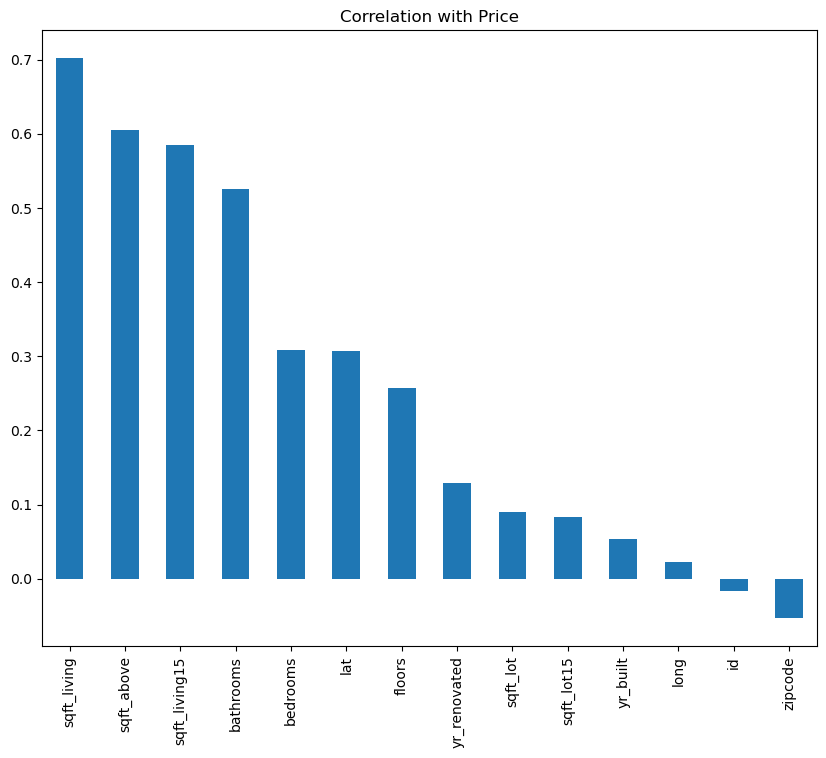

In [145]:
correlation_with_price = numeric_df.corr()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
correlation_with_price.drop('price').plot(kind='bar')
plt.title('Correlation with Price')
plt.show()


From this we infer that sqft_living, sqft_above, sqft_living15 and bathrooms have the strongest correlation with the target variable price.While, zipcode, id, long, yr_built have a lower correlation with price.


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [164]:
# Making a copy of the df before cleaning as a contingency
df_clean = df.copy()
df_clean.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Dealing with missing values

In [166]:
#Dealing with missing values in waterfront column
df_clean['waterfront'] = df_clean['waterfront'].fillna('no')


In [167]:
# Dropping rows missing data in yr_renovated column as it could be the houses were never renovated.
df_clean = df_clean.dropna(subset=['yr_renovated'])


In [168]:
# Filling in missing values in view with the mode as the data is quite skewed as observed in the bar chart
mode_view = df_clean['view'].mode()[0]
df_clean['view'] = df_clean['view'].fillna(mode_view)


In [169]:
df_clean.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Cleaning the sqft_basement column

In [174]:
# Replacing '?' with '0'
df_clean['sqft_basement'] = df_clean['sqft_basement'].replace('?', '0')

# Convert the column to a numeric type
df_clean['sqft_basement'] = pd.to_numeric(df_clean['sqft_basement'])

In [175]:
print(df_clean['sqft_basement'].describe())


count    17755.000000
mean       286.886286
std        441.236519
min          0.000000
25%          0.000000
50%          0.000000
75%        550.000000
max       4820.000000
Name: sqft_basement, dtype: float64


In [177]:
# Convert 'date' column to datetime type
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [176]:
# Checking new shape of our df after cleaning 
print('Shape after dropping:', df_clean.shape)

Shape after dropping: (17755, 21)


### Checking for outliers and removing them from numerical columns exluding the target varibale which is the price

In [178]:
print(df_clean.dtypes)


id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront               object
view                     object
condition                object
grade                    object
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [179]:
# Identifying and dealing with outliers in all numeric columns excluding price
num_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement']

for col in num_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]



In [180]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12908 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             12908 non-null  int64         
 1   date           12908 non-null  datetime64[ns]
 2   price          12908 non-null  float64       
 3   bedrooms       12908 non-null  int64         
 4   bathrooms      12908 non-null  float64       
 5   sqft_living    12908 non-null  int64         
 6   sqft_lot       12908 non-null  int64         
 7   floors         12908 non-null  float64       
 8   waterfront     12908 non-null  object        
 9   view           12908 non-null  object        
 10  condition      12908 non-null  object        
 11  grade          12908 non-null  object        
 12  sqft_above     12908 non-null  int64         
 13  sqft_basement  12908 non-null  float64       
 14  yr_built       12908 non-null  int64         
 15  yr_renovated   12908 non

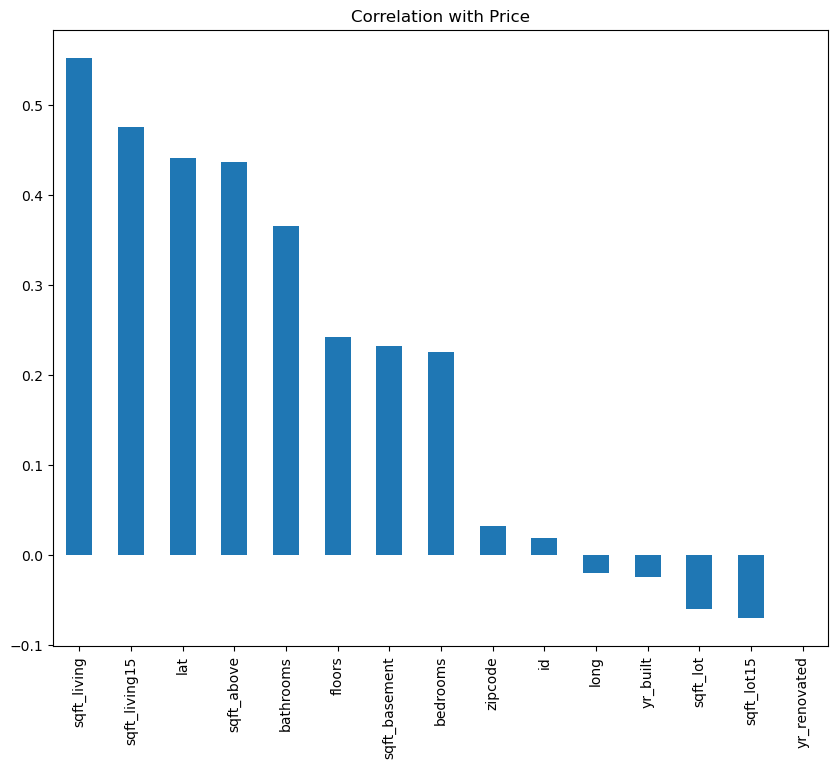

In [181]:
# Now you can calculate the correlation
# Select only the numeric columns (excluding 'price')
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

# Now you can calculate the correlation
correlation_with_price = df_clean[numeric_columns].corr()['price'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
correlation_with_price.drop('price').plot(kind='bar')
plt.title('Correlation with Price')
plt.show()


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Lets creat a feature for total square footage as sqft_living, sqft_above and sqft_basement are all hihgly correlated with the price

In [182]:
# Create a new feature 'total_sqft'
df_clean['total_sqft'] = df_clean['sqft_living'] + df_clean['sqft_above'] + df_clean['sqft_basement']
df_clean.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,total_sqft
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,no,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2360.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,3920.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,3360.0
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,1715,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,3430.0
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NO,NONE,...,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,2120.0


In [183]:
#Calculating the correlation coefficient of our new feature and price
correlation = df_clean['total_sqft'].corr(df_clean['price'])
print(f"Correlation between total_sqft and price: {correlation}")


Correlation between total_sqft and price: 0.5504694613527836


This correlation indicates a moderate positive relationship. This shows that there are likey other factors at play in determing the price of these properties.

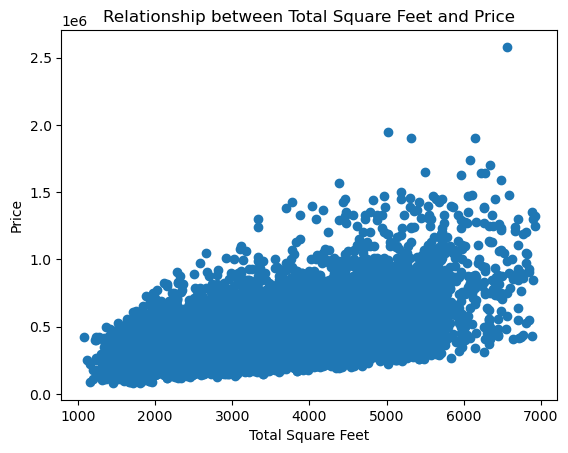

In [155]:
plt.scatter(df_clean['total_sqft'], df_clean['price'])
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Relationship between Total Square Feet and Price')
plt.show()


In [156]:
#A regression analysis
import statsmodels.api as sm

X = df_clean['total_sqft']
y = df_clean['price']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     4085.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:42:37   Log-Likelihood:            -1.6166e+05
No. Observations:               11982   AIC:                         3.233e+05
Df Residuals:                   11980   BIC:                         3.233e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.213e+05   5309.901     22.846      0.0

### Let's create another feature that represents the age the house was when it was sold 


In [185]:
# Extracting the year from the date column
df_clean['year_sold'] = df_clean['date'].dt.year

# Calculating the age of the house when sold
df_clean['house_age'] = df_clean['year_sold'] - df_clean['yr_built']



In [186]:
# Understanding the correlation between house_age when sold and price
correlation = df_clean['house_age'].corr(df_clean['price'])
print(f"Correlation between house_age and price: {correlation}")


Correlation between house_age and price: 0.024953815089375605


In [188]:
X = df_clean['house_age']
y = df_clean['price']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.041
Date:                Sun, 09 Jul 2023   Prob (F-statistic):            0.00458
Time:                        17:46:15   Log-Likelihood:            -1.7709e+05
No. Observations:               12908   AIC:                         3.542e+05
Df Residuals:                   12906   BIC:                         3.542e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.517e+05   3452.274    130.836      0.0

This low correlation shows little relationship between how old a house is when it is sold and the price it is sold at.

In [ ]:
df_clean.head()

### Multiple Linear Regression

In [ ]:
# Splitting the data into a training and testing set




## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***